In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from numpy import pi

In [9]:
# Addition circuit


qr = QuantumRegister(2, 'input')
anc = QuantumRegister(1, 'anc')
cr = ClassicalRegister(2, 'result')
qc = QuantumCircuit(qr, anc, cr)
# qc.initialize([np.sqrt(1)/np.sqrt(2),0,1/np.sqrt(2),0], qr)
# qc.initialize([np.sqrt(10)/np.sqrt(70),np.sqrt(10)/np.sqrt(70),np.sqrt(10)/np.sqrt(70),np.sqrt(10)/np.sqrt(70),
#               0, np.sqrt(10)/np.sqrt(70), 0, 0,
#                0, 0, 0, np.sqrt(10)/np.sqrt(70),
#                0, 0, -np.sqrt(10)/np.sqrt(70), 0
#               ], qr)
# qc.initialize([np.sqrt(2)/np.sqrt(4),np.sqrt(2)/np.sqrt(4)], qr[1])
# qc.x([])
qc.h(qr)
qc.barrier()
# qc.ch(qr[1], qr[0])
# qc.unitary(C, [0,1], label='C')
# qc.unitary(C, [2,3], label='C')
# qc.unitary(myOp1, [0,1], label='test')
# qc.unitary(myOp2, [0,1], label='test')

# qc.append(qft, [1, 3])
qc.barrier()
# qc.h(anc)
# qc.swap(qr[1], anc[1])
# qc.y(qr[0])
qc.barrier()
# qc.append(qftIn, [0,1])

qc.measure(qr, cr)
qc.draw()

┌───┐ ░  ░  ░ ┌─┐   
 input_0: ┤ H ├─░──░──░─┤M├───
          ├───┤ ░  ░  ░ └╥┘┌─┐
 input_1: ┤ H ├─░──░──░──╫─┤M├
          └───┘ ░  ░  ░  ║ └╥┘
   anc_0: ──────░──░──░──╫──╫─
                ░  ░  ░  ║  ║ 
result: 2/═══════════════╩══╩═
                         0  1

{'00': 255, '10': 269, '01': 252, '11': 248}


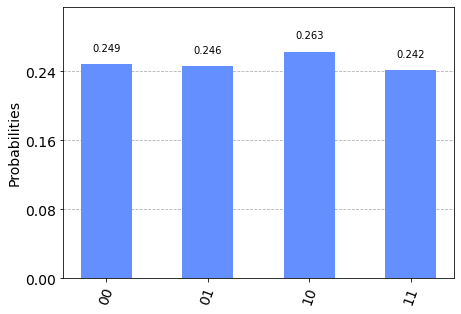

In [10]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(qc, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)

In [126]:
def XOR(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)

In [69]:
clause_list = [[0,1],
               [0,2],
               [1,3],
               [2,3]]

In [22]:
def sudoku_oracle(qc, clause_list, clause_qubits):
    # compute
    i = 0
    for clause in clause_list:
        XOR(qc, in_qubits[clause[0]], in_qubits[clause[1]], clause_qubits[i])
        i += 1
    
    qc.mct(clause_qubits, out0)
    
    # uncompute
    i = 0
    for clause in clause_list:
        XOR(qc, in_qubits[clause[0]], in_qubits[clause[1]], clause_qubits[i])
        i += 1

In [98]:
in_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
out0 = QuantumRegister(1, name='out')
outputBits = ClassicalRegister(4, 'cbits')

qc = QuantumCircuit(in_qubits, clause_qubits, out0, outputBits)

# initiliaze out0 in |->        
qc.initialize([1, -1]/np.sqrt(2), out0)

# put everything in a superposition
qc.h(in_qubits)  
qc.barrier() 

sudoku_oracle(qc, clause_list, clause_qubits)

qc.barrier()

qc.h(out0)
qc.append(qft, in_qubits)

qc.measure(in_qubits, outputBits)

qc.draw(fold=-1)

aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(qc, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

QiskitError: 'Initialize parameter vector has 2 elements, therefore expects 1 qubits. However, 4 were provided.'

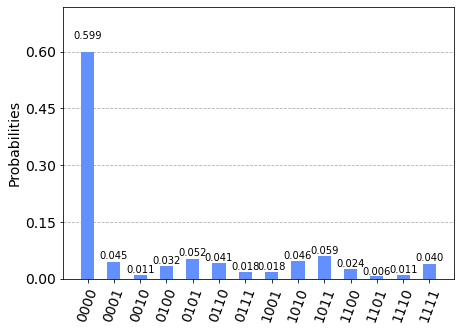

In [92]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(qc, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [149]:
# Random Power of 2

qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.barrier()

qc.h(0)
qc.x(0)
qc.cx(1,0)
qc.h(1)
qc.x(1)
qc.cx(2,1)


qc.measure_all()
qc.draw()


┌───┐ ░ ┌───┐┌───┐┌───┐                ░ ┌─┐      
   q_0: ┤ H ├─░─┤ H ├┤ X ├┤ X ├────────────────░─┤M├──────
        ├───┤ ░ └───┘└───┘└─┬─┘┌───┐┌───┐┌───┐ ░ └╥┘┌─┐   
   q_1: ┤ H ├─░─────────────■──┤ H ├┤ X ├┤ X ├─░──╫─┤M├───
        ├───┤ ░                └───┘└───┘└─┬─┘ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├─░────────────────────────────■───░──╫──╫─┤M├
        └───┘ ░                                ░  ║  ║ └╥┘
meas: 3/══════════════════════════════════════════╩══╩══╩═
                                                  0  1  2

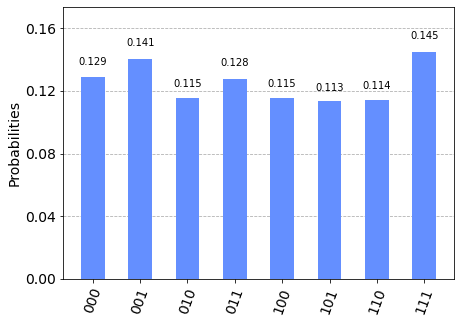

In [150]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(qc, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [3]:
from qiskit import transpile, QuantumCircuit
import qiskit.quantum_info as qi

from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise import NoiseModel, amplitude_damping_error
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.tools.visualization import plot_histogram
import math

In [4]:
cx_op = qi.Operator((1/np.sqrt(2)) * np.array([[1, 1j],[1, -1j]]))
cx_opAd = qi.Operator(np.matrix((1/np.sqrt(2)) * np.array([[1, 1j],[1, -1j]])).getH())

myOp = qi.Operator(
    (1/np.sqrt(3)) * np.array([
    [0,1,1,1],
        [1,0,0,0],
        [1,0,0,0],
        [1,0,0,0]]
    )
)
unitary = myOp.is_unitary()
print(unitary)

False


In [5]:
def normal1D(N):
        a0 = 1 / np.sqrt(N)
        a1 = np.sqrt(2/N)

        result = np.zeros((N, N))

        for u in range(0, N):
            for n in range(0, N):
                coef = a1
                if u == 0:
                    coef = a0

                result[u, n] = coef * np.cos((2*n + 1) * u * pi / (2 * N))

        return result

bMat = qi.Operator((1/np.sqrt(2)) * np.array([[1, 1j],[1, -1j]]))
print("bMat\n", bMat)
bMatAd = qi.Operator(np.matrix((1/np.sqrt(2)) * np.array([[1, 1j],[1, -1j]])).getH())
print("bMatAd\n", bMatAd)
C = qi.Operator(
    np.array(normal1D(4))
)

print(C.is_unitary())

myOp1 = qi.Operator((1/np.sqrt(2)) * np.array(
    [[1, 0, 1, 0],
     [0, 1, 0, 1],
     [-1, 0, 1, 0],
     [0, -1, 0, 1]]
))

myOp2 = qi.Operator((1/np.sqrt(2)) * np.array(
    [[1, 1, 0, 0],
     [-1, 1, 0, 0],
     [0, 0, 1, 1],
     [0, 0, -1, 1]]
))
myOp3 = qi.Operator((1/np.sqrt(2)) * np.array(
    [[1, 0, 0, 1],
     [0, 1, 1, 0],
     [0, -1, 1, 0],
     [1, 0, 0, -1]]
))

print(myOp3.is_unitary())
bMatI = qi.Operator(bMat.expand(qi.Operator(Pauli('I'))))
bMatAdI = qi.Operator(bMatAd.expand(qi.Operator(Pauli('I'))))




bMat
 Operator([[0.70710678+0.j        , 0.        +0.70710678j],
          [0.70710678+0.j        , 0.        -0.70710678j]],
         input_dims=(2,), output_dims=(2,))
bMatAd
 Operator([[0.70710678-0.j        , 0.70710678-0.j        ],
          [0.        -0.70710678j, 0.        +0.70710678j]],
         input_dims=(2,), output_dims=(2,))
True
True
